In [160]:
import numpy as np
import pandas as pd

mat=pd.read_csv('MaterialStrength_train.csv')
mat

#load data

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
795,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,180,61.92
796,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,90,47.22
797,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,180,51.04
798,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,270,55.16


<font size="8">**Part 1 - EDA and Feature Engineering**</font>

In [161]:
mat2 = mat.drop_duplicates()
mat2

#remove dublicates

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
795,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,180,61.92
796,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,90,47.22
797,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,180,51.04
798,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,270,55.16


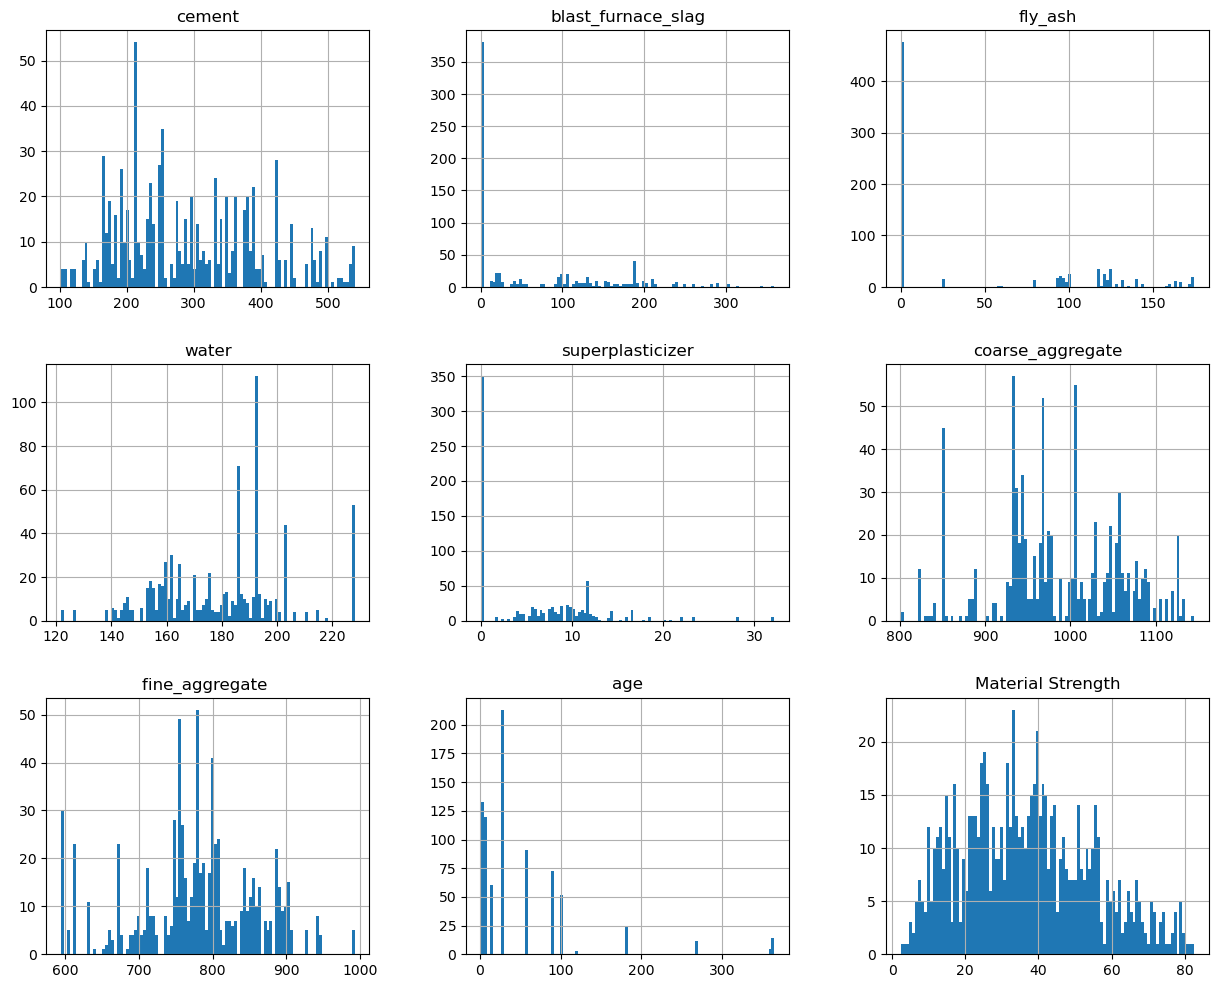

In [162]:
from matplotlib import pyplot as plt

mat.hist(bins=100, figsize=(15,12))
plt.show()

#observe distribution of data in all columns

FROM ABOVE GRAPHS WE CAN OBSERVE THE FOLLOWING

CEMENT AND MATERIAL STRENGTH ARE DISTRIBUTED IN SIMILAR

THERE ARE VARIATIONS IN AGE 

FLYASH HAS HIGH FREEQUECY OF VALUES ZERO

COARSE AGGREGATE AND FINE AGGREGATE ARE DISTRIBUTED SIMILARLY 

MATERIAL STRENGTH IS LOOKING LIKE NORMAL DISTRIBUTION

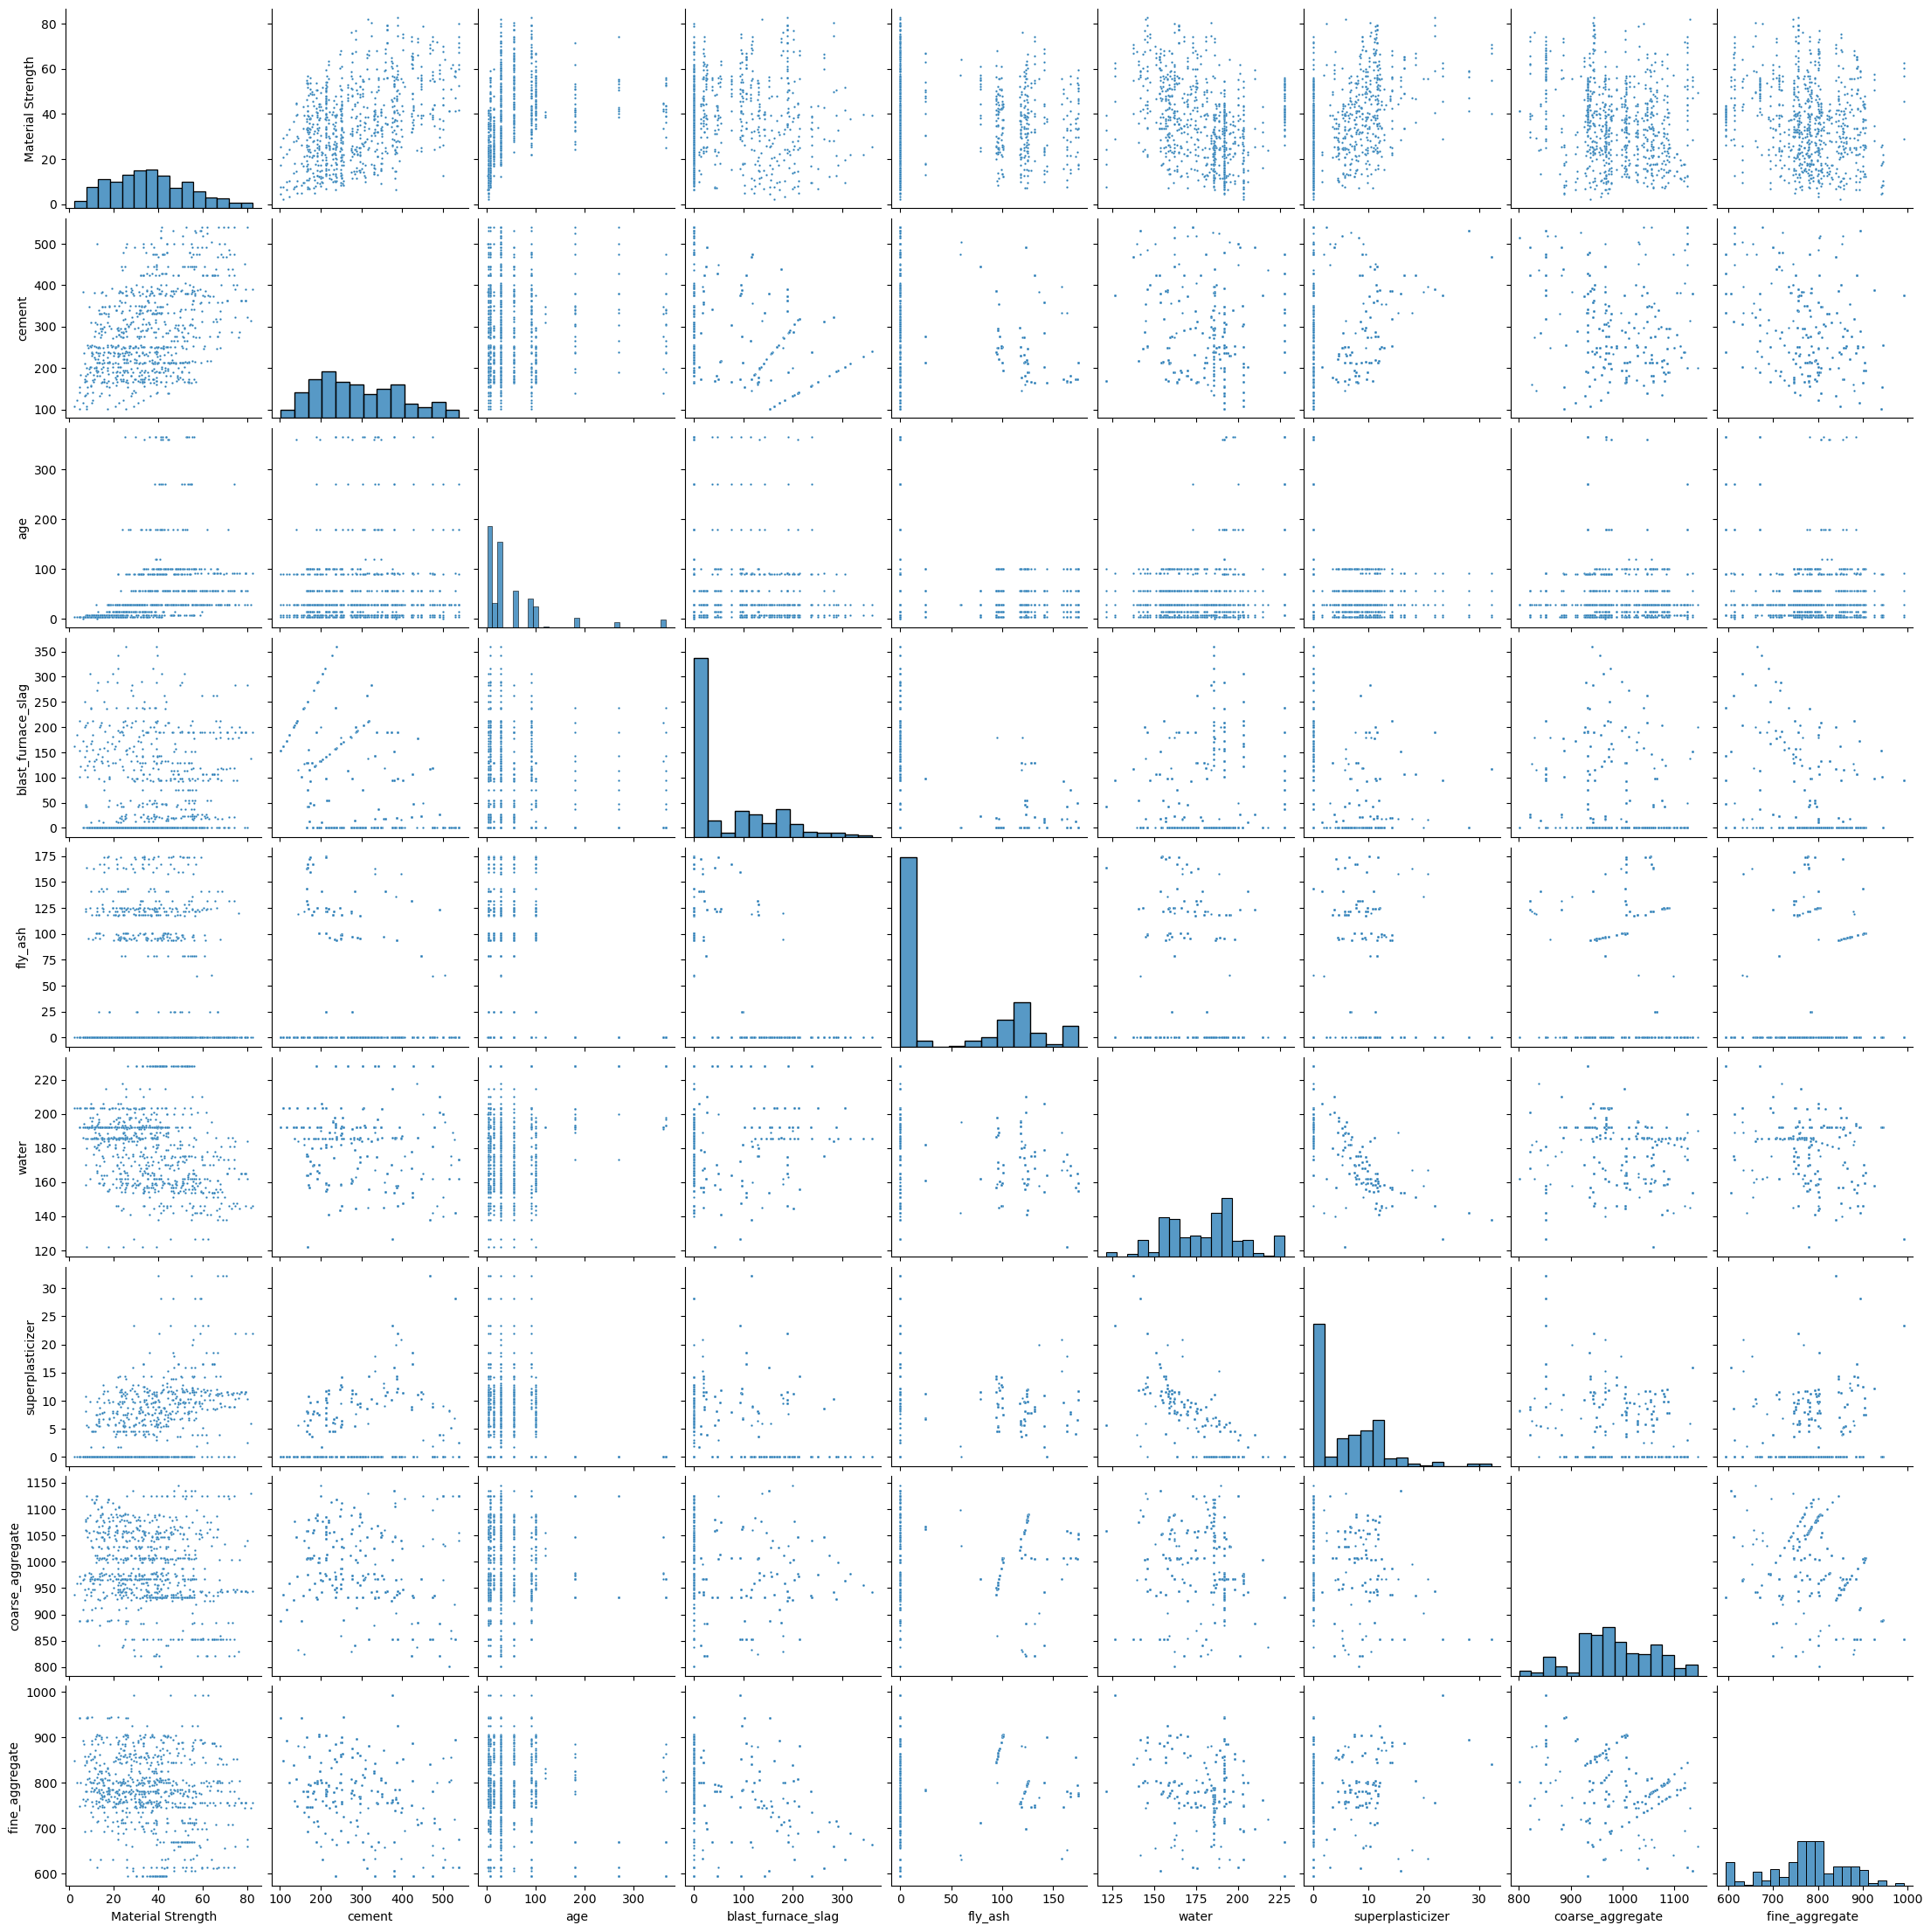

In [163]:

import seaborn as sns


attributes = ["Material Strength","cement","age","blast_furnace_slag","fly_ash","water","superplasticizer","coarse_aggregate","fine_aggregate "]

sns.pairplot(mat[attributes], plot_kws={"s": 3})

# get idea of relations between all attributes and target 

FROM PAIRPLOTS WE CAN ESTIMATE CORELATIONS BETWEEN ALL

CEMENT IS SOMEWHAT LINEARLY RELATED TO MATERIAL STRENGTH

SUPERPLASTISIZER ALSO SOMEWHAT LINEAR 

COARSE AGGREGATE AND FINE AGGREAGATE ARE KIND OF LINEAR TO EACH OTHER 

NOW LETS CHECK FOR OUTLIERS 

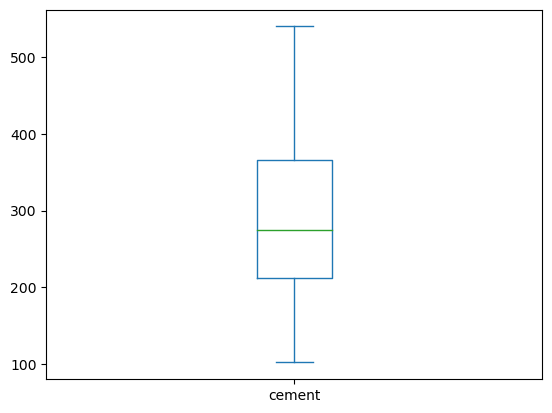

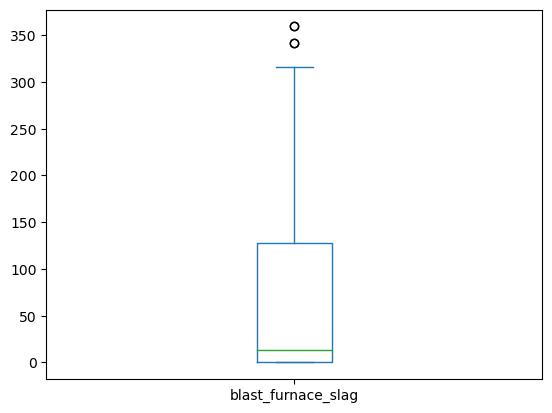

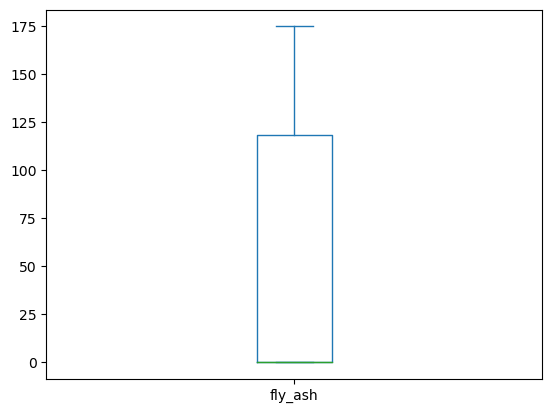

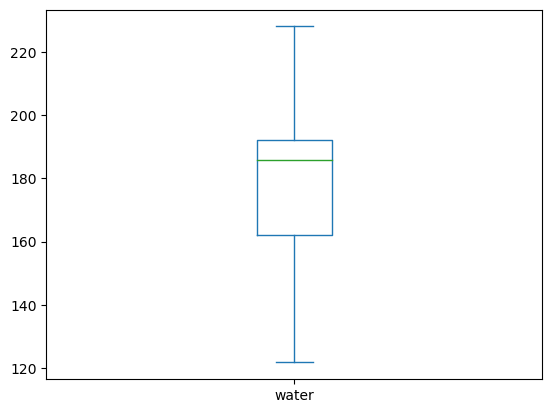

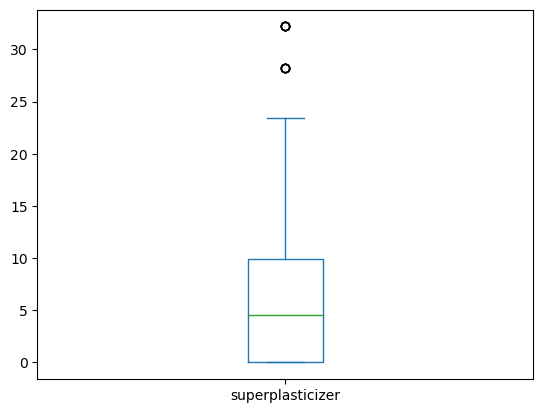

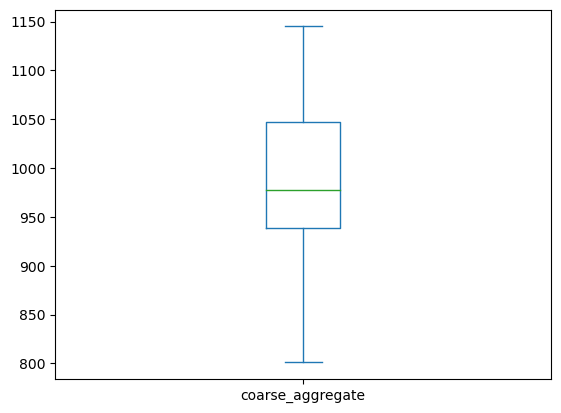

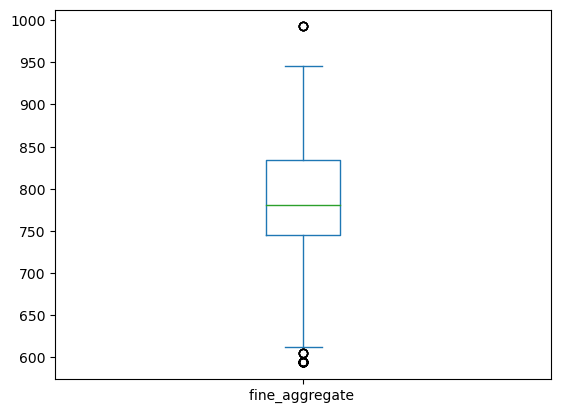

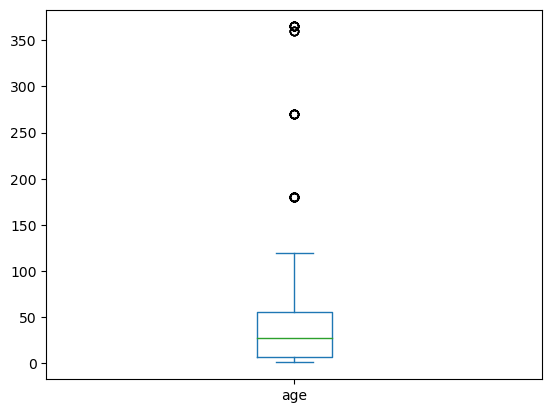

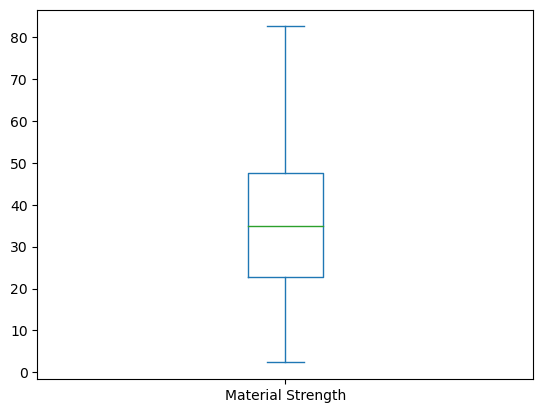

In [164]:

import matplotlib.pyplot as plt

a=(mat2.columns.tolist())
for x in a:
 mat2[x].plot(kind='box')
 plt.show()

LETS MAKE TRANSFORMER TO REMOVE OUTLIERS 

In [165]:
from sklearn.base import BaseEstimator, TransformerMixin


class Removeout(BaseEstimator, TransformerMixin):
    def __init__(self, feauture_to_outlist,q1,q3,thr):
        self.feauture_to_outlist = feauture_to_outlist
        self.q1=q1
        self.q3=q3
        self.thr=thr

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
      olist=[]
      for feauture_to_out in self.feauture_to_outlist:
        q1 = X[feauture_to_out].quantile(self.q1)
        q3 = X[feauture_to_out].quantile(self.q3)
        iqr = q3 - q1
        threshold = self.thr
        outliers_indices = X.index[(X[feauture_to_out] < q1 - threshold * iqr) | (X[feauture_to_out] > q3 + threshold * iqr)].tolist()
        for value in outliers_indices:
           if value not in olist:
              olist.append(value)
      print(olist)        
      train_or=X.drop(olist)
      train_or
      return train_or




In [166]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# This is the main pipeline object, in which we are performing four tasks
# pipeline takes list of tuples of two values as (name of transform, transform object
pre_pipe = Pipeline([
    ('remoove out', Removeout(["age","superplasticizer","fine_aggregate ","coarse_aggregate","fine_aggregate ","cement","blast_furnace_slag","water"],0.25,0.75,1.5))
])

# we are calling fit_transform() on pipeline, so the pipeline is learning parameters from input data.
# Later it also transforms the input data as per the "transform()" definition of each object
traino = pre_pipe.fit_transform(mat2)

traino


[2, 3, 4, 6, 12, 17, 19, 20, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 39, 41, 42, 43, 47, 50, 51, 56, 58, 60, 61, 63, 64, 65, 66, 603, 604, 609, 610, 615, 616, 619, 620, 621, 622, 755, 756, 762, 768, 769, 791, 792, 794, 795, 797, 798, 76, 79, 99, 102, 122, 125, 145, 148, 168, 171, 7, 9, 18, 28, 29, 36, 37, 38, 44, 45, 48, 49, 52, 59, 67, 74, 85, 97, 108, 120, 131, 143, 154, 166, 176, 553, 559, 571, 584]


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90,38.07
...,...,...,...,...,...,...,...,...,...
789,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,28,32.72
790,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,90,39.49
793,302.0,0.0,0.0,203.0,0.0,974.0,817.0,14,18.13
796,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,90,47.22


NOW We have data without outliers

NOW OBSERVE PATTERNS AGAIN

outliers with above index numbers were removed

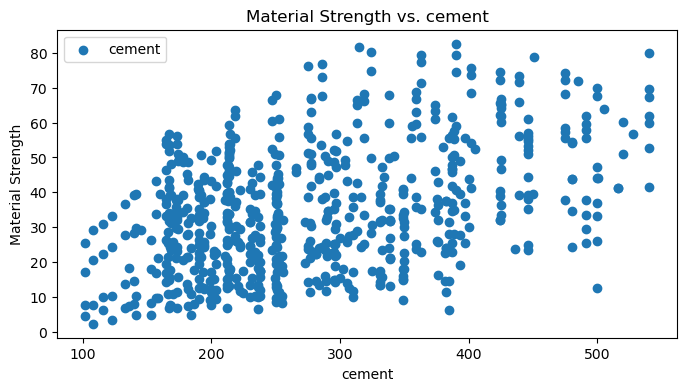

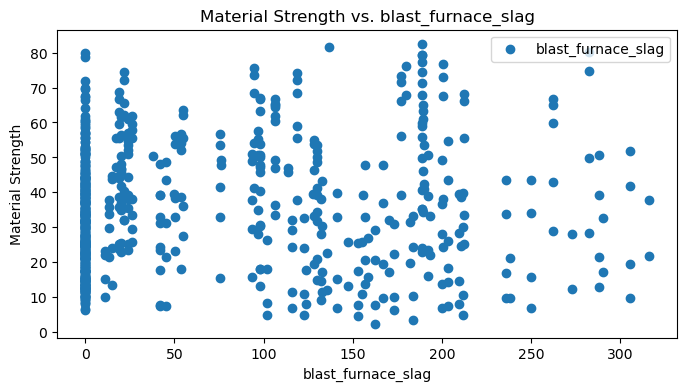

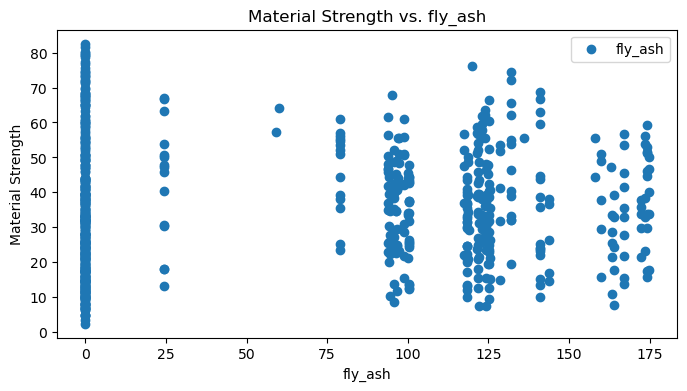

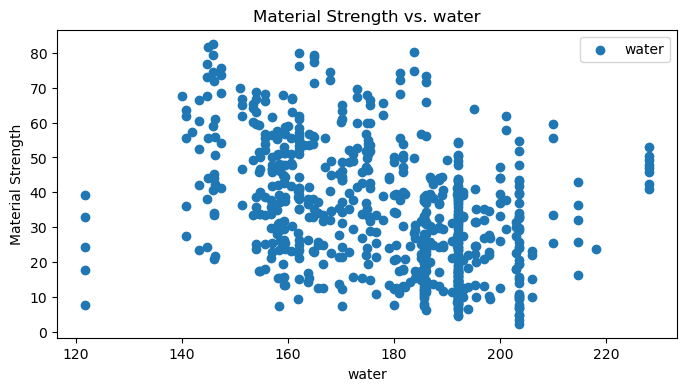

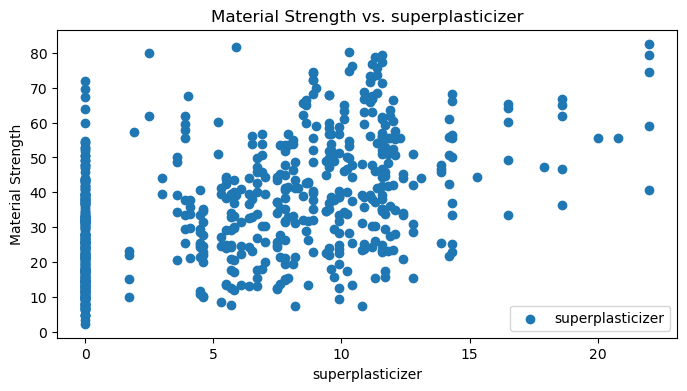

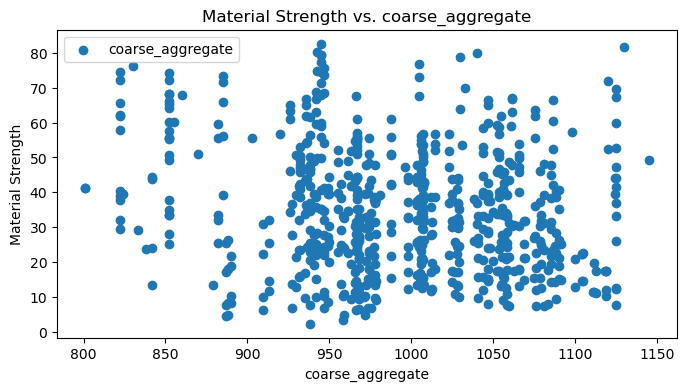

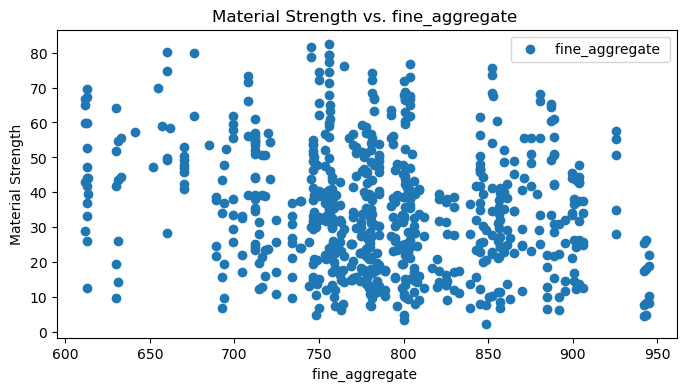

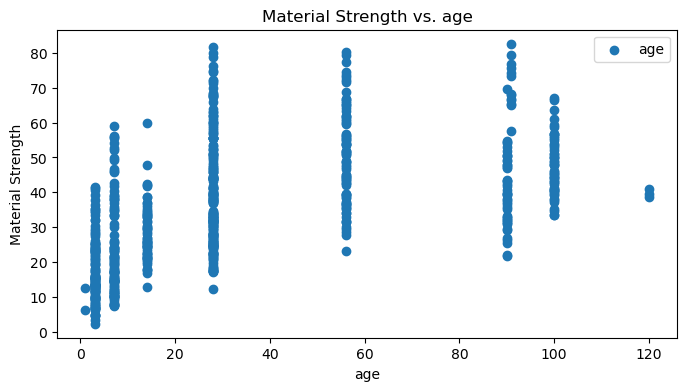

In [167]:
df=traino
y_column = 'Material Strength'


# Iterate through columns and create plots
for column in df.columns:
    if column != y_column:
        plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
        plt.scatter(df[column], df[y_column], label=column)
        plt.xlabel(column)
        plt.ylabel(y_column)
        plt.title(f'{y_column} vs. {column}')
        plt.legend()
        plt.show()

# find material strength relation with all attributes

WE CAN OBSERVER MATERIAL STRENGTH VS CEMENT IS MORE LINEAR 

SUPER PLASTISIZER AND WATER ARE ALSO FAIRLY RELATED 

LETS FIND CORELATION

In [168]:
corr_matrix = traino.corr()
corr_matrix["Material Strength"].sort_values(ascending=False)

Material Strength     1.000000
age                   0.555234
superplasticizer      0.507562
cement                0.438638
blast_furnace_slag    0.097621
fly_ash               0.076789
coarse_aggregate     -0.177931
fine_aggregate       -0.217973
water                -0.384900
Name: Material Strength, dtype: float64

SINCE WE CAN SEE AGE SUPERPLASTICIZER CEMENT ARE FAIRLY CORELATED IN INCREASING

WHILE WATER HAS FAIR CORELATION IN DECREASING 

LETS TRY TO DERIVE SOME MORE FEAUTURES 

by adding feautures of increasing kind (high+value + high+value)

diving increasing kind by decreasing kind ((high+value/low -ve value))

FROM CHEMISTRY CEMENT WATER RATIO  SHALL BE MORE FOR GOOD QUALITY 

blast furnance slag , flash are mixed with cement for more quality

aggreagates act dispencers to balance incase of less water 

age distribution spread is unfrequent so lets try to apply log on it 

references :https://www.hindawi.com/journals/amse/2021/6673033/

In [169]:
df=traino

df["cembywater"]=df["cement"]/df["water"]
df["cemplast"]=df["cement"]+df["superplasticizer"]
df["addons"]=(df["blast_furnace_slag"]+df["fly_ash"]+df["cement"])/df["water"]
df["cembyaggregate"]=(df["blast_furnace_slag"]+df["fly_ash"]+df["cement"])/((df["fine_aggregate "]+df["coarse_aggregate"])*df["water"])
df["aggregate"]=df["fine_aggregate "]+df["coarse_aggregate"]
df['agelog'] = np.sqrt(df['age'])


df=traino
traino

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength,cembywater,cemplast,addons,cembyaggregate,aggregate,agelog
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,3.333333,542.5,3.333333,0.001943,1716.0,5.291503
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,3.333333,542.5,3.333333,0.001926,1731.0,5.291503
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03,1.166667,266.0,1.666667,0.001040,1602.0,9.486833
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1.166667,266.0,1.666667,0.001040,1602.0,5.291503
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90,38.07,1.034375,198.6,1.723958,0.000956,1803.9,9.486833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,28,32.72,1.817708,349.0,1.817708,0.000981,1853.0,5.291503
790,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,90,39.49,1.817708,349.0,1.817708,0.000981,1853.0,9.486833
793,302.0,0.0,0.0,203.0,0.0,974.0,817.0,14,18.13,1.487685,302.0,1.487685,0.000831,1791.0,3.741657
796,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,90,47.22,2.500000,500.0,2.500000,0.001438,1738.0,9.486833


check relation with material strength again

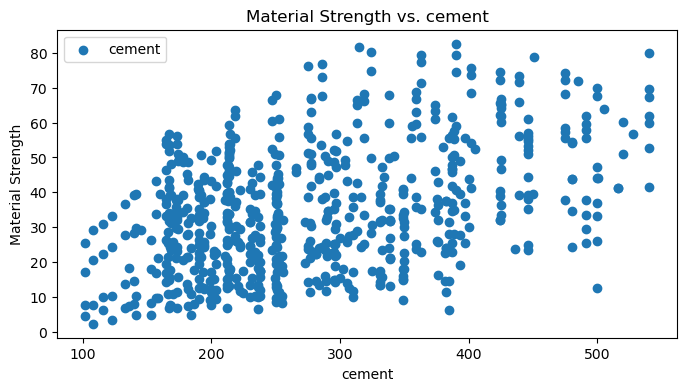

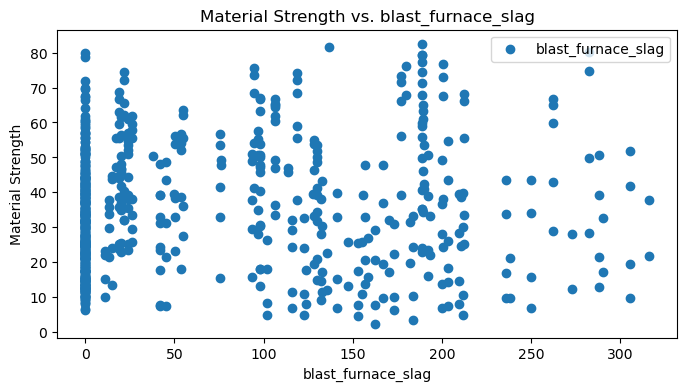

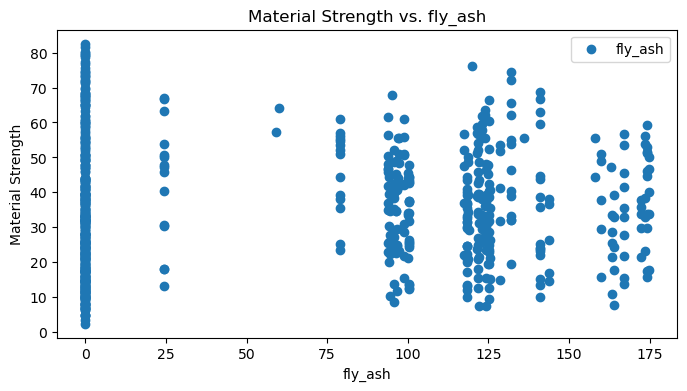

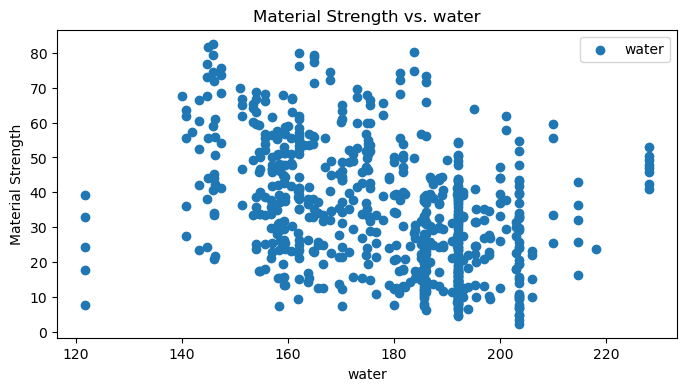

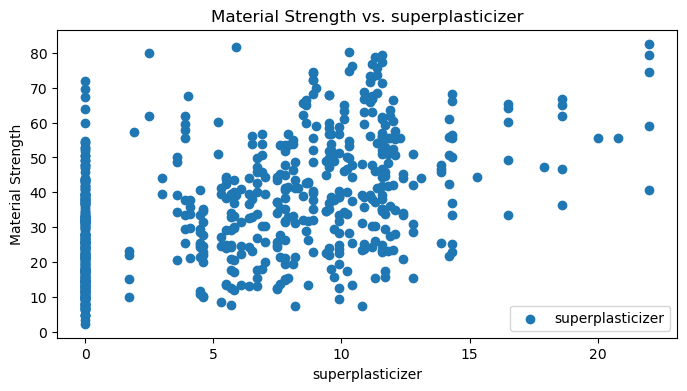

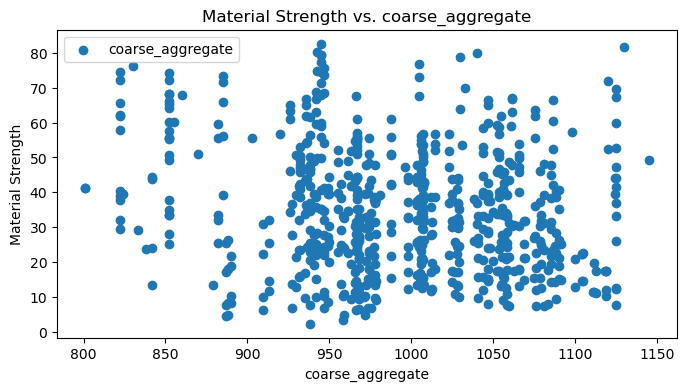

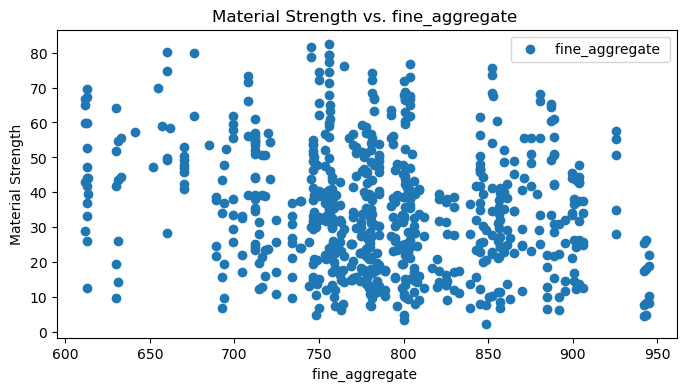

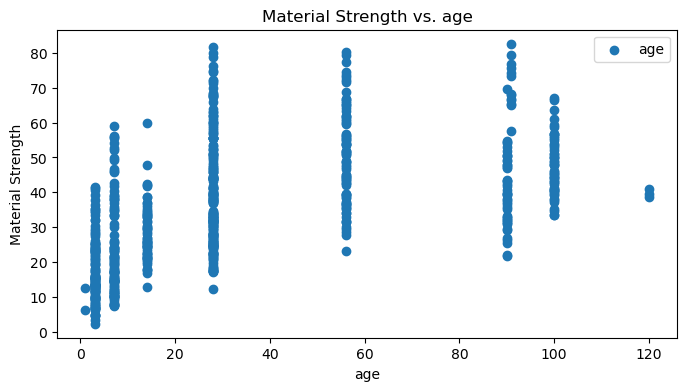

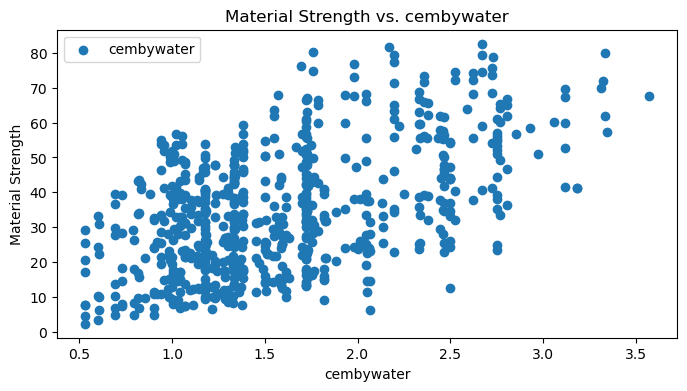

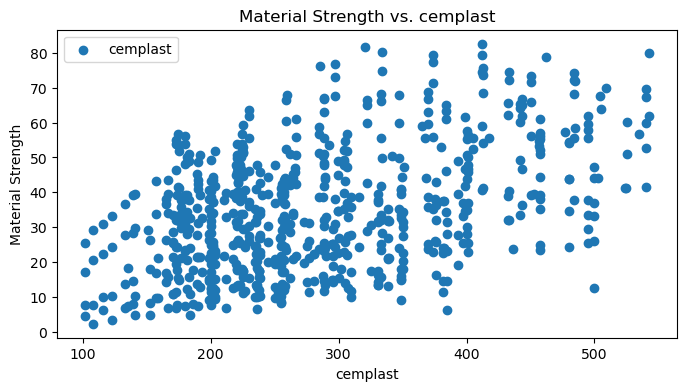

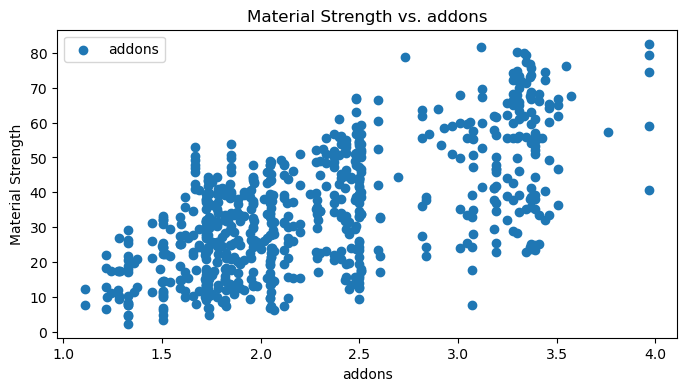

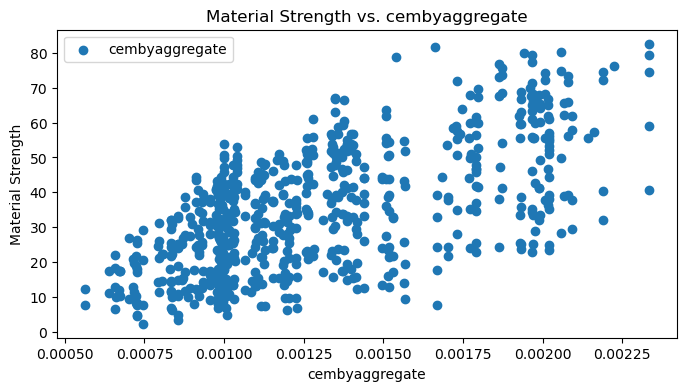

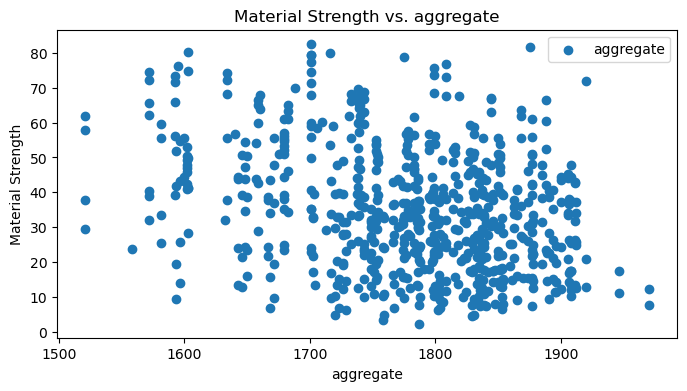

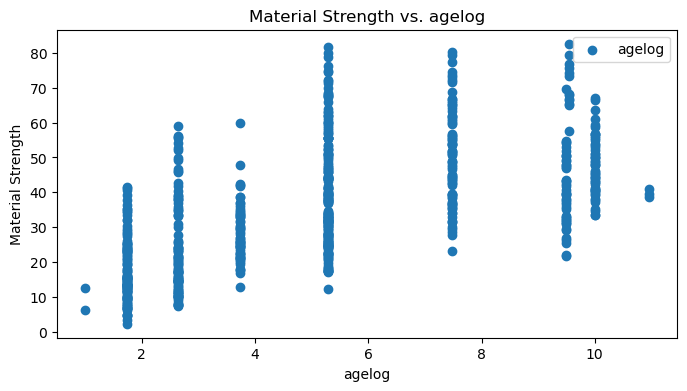

In [170]:
df=traino
y_column = 'Material Strength'


# Iterate through columns and create plots
for column in df.columns:
    if column != y_column:
        plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
        plt.scatter(df[column], df[y_column], label=column)
        plt.xlabel(column)
        plt.ylabel(y_column)
        plt.title(f'{y_column} vs. {column}')
        plt.legend()
        plt.show()

we can observer more linearity in the new feautures like cembywater , cembyaggregate etc

lets find corelation again

In [171]:
corr_matrix = traino.corr()
corr_matrix["Material Strength"].sort_values(ascending=False)

Material Strength     1.000000
addons                0.656270
cembyaggregate        0.644690
agelog                0.619998
age                   0.555234
cembywater            0.532283
superplasticizer      0.507562
cemplast              0.460876
cement                0.438638
blast_furnace_slag    0.097621
fly_ash               0.076789
coarse_aggregate     -0.177931
fine_aggregate       -0.217973
aggregate            -0.320862
water                -0.384900
Name: Material Strength, dtype: float64

we can find some new feautures with more corelation

lets remove some feautures

age log has more corelation than age 

In [172]:
traino2=traino.drop("fly_ash",axis=1)
traino3=traino2.drop("blast_furnace_slag",axis=1)
traino3=traino3.drop("age",axis=1)


LETS SEPARATE MATERIAL STRENGTH FROM REMAINING 



In [173]:
att=traino3.drop("Material Strength",axis=1) #att is set of all attributes
sol=traino3["Material Strength"].copy()
sol

0      79.99
1      61.89
5      47.03
8      45.85
10     38.07
       ...  
789    32.72
790    39.49
793    18.13
796    47.22
799    41.64
Name: Material Strength, Length: 682, dtype: float64

In [174]:
for column in att :
    a=df[column].values
    for num in a :
        if num == 0 :
            print(column)
            break

# find columns with zero values 



superplasticizer


only superplastisizer and agelog have zero values but it has more corelation 

so i am not removing it 

lets scale the attributes

In [175]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(att)

xattr=scaler.transform(att)

len(xattr[0])
xattr

array([[1.        , 0.37853107, 0.11363636, ..., 0.77911835, 0.43429844,
        0.43111394],
       [1.        , 0.37853107, 0.11363636, ..., 0.76960449, 0.46770601,
        0.43111394],
       [0.37442922, 1.        , 0.        , ..., 0.26923256, 0.18040089,
        0.85256664],
       ...,
       [0.456621  , 0.7645951 , 0.        , ..., 0.15069829, 0.6013363 ,
        0.27542025],
       [0.9086758 , 0.73634652, 0.        , ..., 0.49422044, 0.48329621,
        0.85256664],
       [1.        , 0.48210923, 0.        , ..., 0.69629592, 0.48329621,
        0.07354005]])

In [176]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

scaler = Pipeline([
    ('minmaxscaler', MinMaxScaler())
])

xattr = scaler.fit_transform(att)
xattr

array([[1.        , 0.37853107, 0.11363636, ..., 0.77911835, 0.43429844,
        0.43111394],
       [1.        , 0.37853107, 0.11363636, ..., 0.76960449, 0.46770601,
        0.43111394],
       [0.37442922, 1.        , 0.        , ..., 0.26923256, 0.18040089,
        0.85256664],
       ...,
       [0.456621  , 0.7645951 , 0.        , ..., 0.15069829, 0.6013363 ,
        0.27542025],
       [0.9086758 , 0.73634652, 0.        , ..., 0.49422044, 0.48329621,
        0.85256664],
       [1.        , 0.48210923, 0.        , ..., 0.69629592, 0.48329621,
        0.07354005]])

In [177]:
# The first model is Linear Regression model.

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
# Here, by calling .fit(), we are calculating parameters of the model only
linear_model.fit(xattr, sol)

LinearRegression()

In [178]:
# Lets check MSE & MAE errors on linear model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

tla = linear_model.predict(xattr)

linear_rmse = mean_squared_error(sol, tla, squared=False)
linear_mae = mean_absolute_error(sol, tla)

print("Root Mean Squared Error of Linear Model :", linear_rmse)
print("Mean Absolute Error of Linear Model :", linear_mae)



Root Mean Squared Error of Linear Model : 7.229062420789073
Mean Absolute Error of Linear Model : 5.399154142228738


In [179]:
from sklearn.model_selection import cross_val_score

# Cross validation for linear model

scores = cross_val_score(linear_model,
                         xattr,
                         sol,
                         scoring="neg_mean_squared_error",
                         cv=10)

linear_rmse_scores = np.sqrt(-scores)

print("Scores:", linear_rmse_scores)
print("Mean:", linear_rmse_scores.mean())
print("Standard deviation:", linear_rmse_scores.std())

Scores: [9.83792902 8.95627274 5.13943759 8.1339914  9.51182836 9.10260053
 6.55535079 5.03770105 4.28028675 6.37092646]
Mean: 7.292632469618184
Standard deviation: 1.958143251868467


<font size="8">*Statistical Analysis*</font>

In [180]:
import statsmodels.api as sm

X=att
Y=sol


model = sm.OLS(Y, X).fit()

print(model.summary())



                                 OLS Regression Results                                
Dep. Variable:      Material Strength   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2238.
Date:                Mon, 04 Sep 2023   Prob (F-statistic):                        0.00
Time:                        12:40:23   Log-Likelihood:                         -2295.1
No. Observations:                 682   AIC:                                      4608.
Df Residuals:                     673   BIC:                                      4649.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Rsquare is 0.968 close to 1 indicates our model is good 

also there is high value of F-static and low value of probability of F-stat

coarse aggregate and cembywater have high p>|t| values 

lets remove those and make another model 

MAKE NEW MODEL FROM ABOVE INFERENCE

In [181]:
import statsmodels.api as sm

Y=sol
a=att.drop("coarse_aggregate",axis=1)
a=a.drop("cembywater",axis=1)
a=a.drop("cembyaggregate",axis=1)
a=a.drop("aggregate",axis=1)

X=a
pp=a


model = sm.OLS(Y, X).fit()


print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:      Material Strength   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              3328.
Date:                Mon, 04 Sep 2023   Prob (F-statistic):                        0.00
Time:                        12:40:23   Log-Likelihood:                         -2299.4
No. Observations:                 682   AIC:                                      4611.
Df Residuals:                     676   BIC:                                      4638.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

now all P>|t| values are less

and Fstattic increased the new can be a better model 

Lets check rmse for this 

In [182]:


from sklearn.linear_model import LinearRegression

ascal=scaler.fit_transform(a) #new attributes scaled


linear_model = LinearRegression()
linear_model.fit(ascal, sol)

LinearRegression()

In [183]:


from sklearn.model_selection import cross_val_score

# Cross validation for linear model

scores = cross_val_score(linear_model,
                         ascal,
                         sol,
                         scoring="neg_mean_squared_error",
                         cv=10)

linear_rmse_scores = np.sqrt(-scores)

print("Scores:", linear_rmse_scores)
print("Mean:", linear_rmse_scores.mean())
print("Standard deviation:", linear_rmse_scores.std())


Scores: [9.95857182 8.89082855 5.02105351 7.82258473 9.82588003 8.4654652
 6.55948642 4.98083937 4.38657065 6.56579841]
Mean: 7.247707867987638
Standard deviation: 1.9424328773570012


this model has slightly better mean 7.29 compared to older one 7.24

so OLS helped me to find a better model 

<font size="8">**Exact Solution**</font>

In [205]:

b=sol.to_numpy() # real values of material strength 

a=np.array(ascal)


aone = np.column_stack((np.ones(a.shape[0]), a)) # add ones to attributes array

X = np.linalg.inv(aone.T.dot(aone)).dot(aone.T).dot(b) # X=(A_TRANSPOSE.A)

print(X)



pre=aone.dot(X)



linear_rmse = mean_squared_error(sol, pre, squared=False)
print(linear_rmse)


[-3.30941803 -5.39958165  0.59109149  8.07352374 -4.59103562 25.81631539
 35.31035891 39.5770713 ]
7.322253165003561


$\hat{\Theta} = (X^T X)^{-1} X^T Y$

$\hat{\alpha} = (X \hat{\Theta}^T )$

the above formula is used 

here X is aone in code

Y is b in code 

Pred is alpha 

by true solution we got rmse 7.322


In [206]:
PX = np.linalg.pinv(aone).dot(b)
preP=aone.dot(PX.T)



linear_rmse = mean_squared_error(sol, preP, squared=False)
print(linear_rmse)

7.034274155555063



$\hat{\Theta} = X^+ y$



X+ is PX is pseudo inverse of aone 

by this we are getting rmse 7.034



<font size="8">**Gradient Descent**</font>

In [186]:
#BATCH GRADIENT



B=sol.values # material strength values in array

on=aone # take attributes and add 1

k=len(B) #no of rows in batch

len(on[0])

initialstate=np.random.randn(8,1) # random theta

init=[]
for value in initialstate:
    init.append(value[0])

init=np.array(init) # the initial random theta

stepsx=[]
loss=[]

steps=1000

i=0
for step in range(steps):
  i=i+1
  stepsx.append(i) # to make iterations axis 
  constant=2/k
  # multiply attr with theta
  pre=on.dot(init)


  #subtract real values from predicted values 

  field= (pre-B)
  linear_rmse = mean_squared_error(sol, pre, squared=False) # rmse of the stepa
  loss.append(linear_rmse)
  # multiply with error with attributes  and constant 
  mass=(on.T)

  velocity=(2/k)*(mass.dot(field))
  friction=0.25#eta
  init=init-(friction*velocity) # next step
  if (np.linalg.norm(velocity))<0.001 : # thrushold value
    break

linear_rmse = mean_squared_error(sol, pre, squared=False)

print(linear_rmse)

init





7.035715357206711


array([ 0.1827314 ,  6.34392413, -1.34840932,  8.94870522, -5.25786593,
        7.12383088, 34.16403997, 39.54066469])

norm of velocity or gradient should be more than 0.001

this is the convergence criterion

FIND LOSS CURVERS

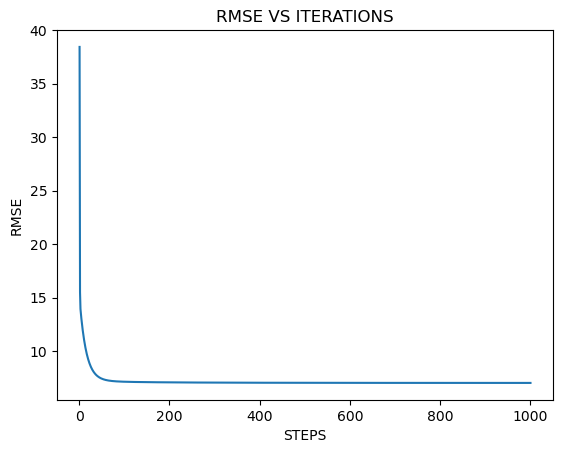

In [187]:
import matplotlib.pyplot as plt

# Sample data (two lists)
x = stepsx
y = loss

# Create a plot
plt.plot(x, y)

# Add labels and a title
plt.xlabel('STEPS')
plt.ylabel('RMSE')
plt.title('RMSE VS ITERATIONS')

# Show the plot
plt.show()

FINDING BEST HYPERPARAMETERS 

In [188]:
etas=[0.20,0.25,0.05,0.025,0.01]

mse=[]
for eta in etas:
 initialstate=np.random.randn(8,1) # random theta
 init=[]
 for value in initialstate:
    init.append(value[0])

 init=np.array(init) # the initial random theta    
 for step in range(steps):
  i=i+1
  stepsx.append(i) # to make iterations axis 
  constant=2/k
  # multiply attr with theta
  pre=on.dot(init)


  #subtract real values from predicted values 

  field= (pre-B)
  
  # multiply with error with attributes  and constant 
  mass=(on.T)

  velocity=(2/k)*(mass.dot(field))
  friction=eta
  init=init-(friction*velocity) # next step


 pre=on.dot(init)
 
 linear_rmse = mean_squared_error(sol, pre, squared=False)
 mse.append(linear_rmse)

print(mse)


[7.037354636799327, 7.035676607719331, 7.073800516784437, 7.131878846085776, 7.698404933249191]


best value of eta is 0.25

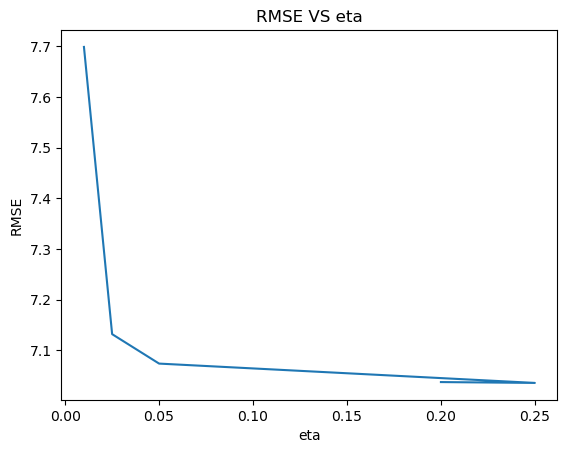

In [189]:
import matplotlib.pyplot as plt

# Sample data (two lists)
x = etas
y = mse

# Create a plot
plt.plot(x, y)

# Add labels and a title
plt.xlabel('eta')
plt.ylabel('RMSE')
plt.title('RMSE VS eta')

# Show the plot
plt.show()

we are getting rmse of 7.035 with grading descent of eta 0.25 

<font size="8">**KNN**</font>

In [190]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
mat=pd.read_csv('MaterialStrength_train.csv')
# train_test_split is a very common and standard function to split dataset into training & testing set
# Here test_size takes what fraction of dataset should be in test set.
# We can use shuffle=True to set random sample of the test set.
train_set, test_set = train_test_split(traino, test_size=0.05, shuffle=True, random_state=20)

In [191]:



train_features = train_set.drop("Material Strength", axis=1)   # Training feature
train_labels = train_set["Material Strength"].copy()           # Training label
train_features.head()
test_labels = test_set["Material Strength"].copy()           # Training label
test_features = test_set.drop("Material Strength", axis=1)   # Training feature


28.128784017857143


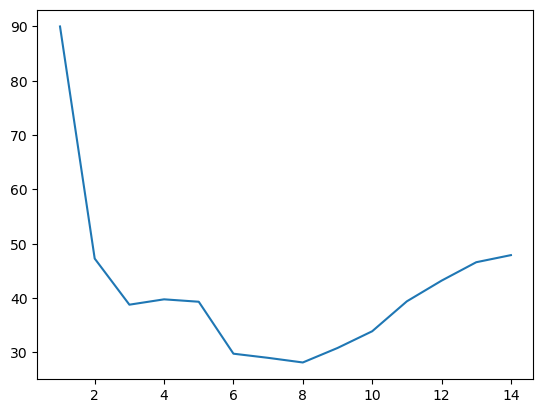

In [192]:

ak=train_features.drop("coarse_aggregate",axis=1)
ak=ak.drop("cembywater",axis=1)
ak=ak.drop("cembyaggregate",axis=1)
ak=ak.drop("aggregate",axis=1)

bk=test_features.drop("coarse_aggregate",axis=1)
bk=bk.drop("cembywater",axis=1)
bk=bk.drop("cembyaggregate",axis=1)
bk=bk.drop("aggregate",axis=1)


xsca = scaler.fit_transform(ak)
pi=scaler.fit_transform(bk)


k=3
knn_regressor = KNeighborsRegressor(n_neighbors=8)
knn_regressor.fit(xsca,train_labels)

y_pred = knn_regressor.predict(pi)
mse = mean_squared_error(test_labels, y_pred)
r2 = r2_score(test_labels, y_pred)

print(mse)

mses=[]
rsco=[]
Kk = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

for k in range(1,15):
 knn_regressor = KNeighborsRegressor(n_neighbors=k)
 knn_regressor.fit(xsca,train_labels)

 y_pred = knn_regressor.predict(pi)
 mses.append(mean_squared_error(test_labels, y_pred))
 rsco.append(r2_score(test_labels, y_pred))


plt.plot(Kk,mses)

optimal value of k is 8

mse is around 28.128

rmse is 9.21

in my model case  non paramatric KNeighborsRegressor has given less accuracy 

KNN is easy to apply but has given less accuracy as it is an approximate method based on nearest similar values

<font size="8">**GLM**</font>

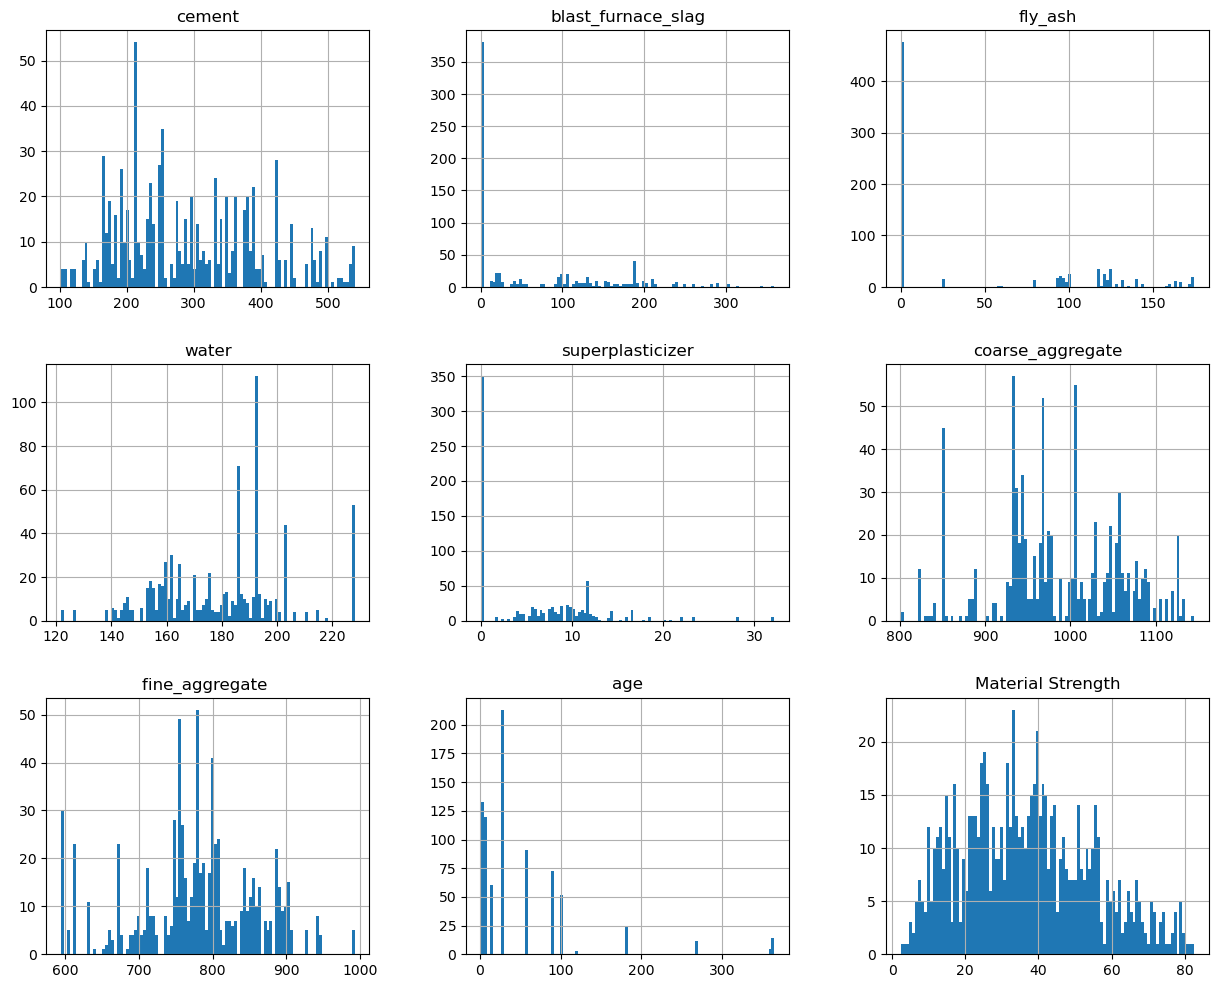

In [193]:
from matplotlib import pyplot as plt

mat.hist(bins=100, figsize=(15,12))
plt.show()

#observe distribution of data in all columns

In [194]:
print(mat["Material Strength"].std()) #std
print(mat["Material Strength"].mean() )# mean

17.62305295867673
36.6541875


since std is considerbly low and material strength is continuous variable

FROM GRAPH ALSO MATERIAL STRENGTH IS SOMEWHAT LIKE NORMAL DISTRIBUTION SHAPE

Gausian is more suitable

identity link is used in guassian distribution 

here linear predictor is assumed to be mean 

https://www.statsmodels.org/dev/generated/statsmodels.genmod.generalized_linear_model.GLM.html
https://www.statisticshowto.com/link-function/

In [208]:
from sklearn.metrics import mean_squared_error

guasian_model = sm.GLM(sol, aone, family=sm.families.Gaussian(link=sm.families.links.identity()))
guasian_results = guasian_model.fit()


y_pred=guasian_results.predict(aone)


mse = mean_squared_error(sol, y_pred)
print(mse)



49.48101289550989


c:\Users\Vamsi Krishna\anaconda3\envs\vamsi\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [214]:
gamma_model = sm.GLM(sol, aone, family=sm.families.Gamma())

gamma_results = gamma_model.fit()


y_pred=gamma_results.predict(aone)

mse = mean_squared_error(sol, y_pred)

mse

c:\Users\Vamsi Krishna\anaconda3\envs\vamsi\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
c:\Users\Vamsi Krishna\anaconda3\envs\vamsi\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


54.5851022015042

gamma is not giving good results

<font size="8">*Test Output*</font>

I AM USING GRADIENT DESCENT SOLUTION FINALLY 

In [197]:
import numpy as np
import pandas as pd

mat=pd.read_csv('MaterialStrength_test.csv')
mat

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,material_strength
0,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,7,NaN
1,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,NaN
2,339.0,0.0,0.0,185.0,0.0,1060.0,754.0,28,NaN
3,393.0,0.0,0.0,192.0,0.0,940.0,758.0,3,NaN
4,393.0,0.0,0.0,192.0,0.0,940.0,758.0,28,NaN
...,...,...,...,...,...,...,...,...,...
225,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,NaN
226,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,NaN
227,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,NaN
228,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,NaN


In [198]:
#transform testdata according to model

df=mat

df["cembywater"]=df["cement"]/df["water"]
df["cemplast"]=df["cement"]+df["superplasticizer"]
df["addons"]=(df["blast_furnace_slag"]+df["fly_ash"]+df["cement"])/df["water"]
df["cembyaggregate"]=(df["blast_furnace_slag"]+df["fly_ash"]+df["cement"])/((df["fine_aggregate "]+df["coarse_aggregate"])*df["water"])
df["aggregate"]=df["fine_aggregate "]+df["coarse_aggregate"]
df['agelog'] = np.sqrt(df['age'])

df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,material_strength,cembywater,cemplast,addons,cembyaggregate,aggregate,agelog
0,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,7,NaN,1.362162,252.0,1.362162,0.000719,1895.0,2.645751
1,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,NaN,1.362162,252.0,1.362162,0.000719,1895.0,5.291503
2,339.0,0.0,0.0,185.0,0.0,1060.0,754.0,28,NaN,1.832432,339.0,1.832432,0.001010,1814.0,5.291503
3,393.0,0.0,0.0,192.0,0.0,940.0,758.0,3,NaN,2.046875,393.0,2.046875,0.001205,1698.0,1.732051
4,393.0,0.0,0.0,192.0,0.0,940.0,758.0,28,NaN,2.046875,393.0,2.046875,0.001205,1698.0,5.291503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,NaN,1.538976,285.3,2.687639,0.001640,1638.4,5.291503
226,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,NaN,1.643878,332.6,2.233673,0.001369,1631.3,5.291503
227,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,NaN,0.770628,154.6,2.057602,0.001230,1672.4,5.291503
228,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,NaN,0.906036,170.4,1.969248,0.001107,1778.5,5.291503


In [199]:
trainox2=df.drop("fly_ash",axis=1)
trainox3=trainox2.drop("blast_furnace_slag",axis=1)
trainox3=trainox3.drop("age",axis=1)

trainox3

,cement,water,superplasticizer,coarse_aggregate,fine_aggregate,material_strength,cembywater,cemplast,addons,cembyaggregate,aggregate,agelog
0,252.0,185.0,0.0,1111.0,784.0,NaN,1.362162,252.0,1.362162,0.000719,1895.0,2.645751
1,252.0,185.0,0.0,1111.0,784.0,NaN,1.362162,252.0,1.362162,0.000719,1895.0,5.291503
2,339.0,185.0,0.0,1060.0,754.0,NaN,1.832432,339.0,1.832432,0.001010,1814.0,5.291503
3,393.0,192.0,0.0,940.0,758.0,NaN,2.046875,393.0,2.046875,0.001205,1698.0,1.732051
4,393.0,192.0,0.0,940.0,758.0,NaN,2.046875,393.0,2.046875,0.001205,1698.0,5.291503
...,...,...,...,...,...,...,...,...,...,...,...,...
225,276.4,179.6,8.9,870.1,768.3,NaN,1.538976,285.3,2.687639,0.001640,1638.4,5.291503
226,322.2,196.0,10.4,817.9,813.4,NaN,1.643878,332.6,2.233673,0.001369,1631.3,5.291503
227,148.5,192.7,6.1,892.4,780.0,NaN,0.770628,154.6,2.057602,0.001230,1672.4,5.291503
228,159.1,175.6,11.3,989.6,788.9,NaN,0.906036,170.4,1.969248,0.001107,1778.5,5.291503


In [200]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

scaler = Pipeline([
    ('minmaxscaler', MinMaxScaler())
])


asc=trainox3.drop("coarse_aggregate",axis=1)
asc=asc.drop("cembywater",axis=1)
asc=asc.drop("cembyaggregate",axis=1)
asc=asc.drop("aggregate",axis=1)
asc=asc.drop("material_strength",axis=1)


asc1=scaler.fit_transform(asc)
aone = np.column_stack((np.ones(asc1.shape[0]), asc1)) # add ones to attributes array

theta=[ 0.15776926,  6.78965247, -1.32969037,  8.95970157, -5.24157797,
        6.66522086, 34.19606064, 39.5418446 ]
pred=aone.dot(np.array(theta).T)       

pred

pd.DataFrame(pred).to_csv('strength_predvamsi22.csv', header = False,index=False)

pred




array([ 2.60806558,  8.67582004, 19.36588827, 16.16648267, 24.32971386,
       33.95126611, 18.58491287, 24.65266732,  2.48575337,  8.67582004,
        7.14207973, 13.20983419, 22.83138644, 31.84345625, 44.5884476 ,
       34.51933344, 36.61481017, 39.12815635, 42.68256462, 52.30411687,
       68.23139107, 10.43828682, 13.99269509, 32.62631715, 11.49433127,
       26.49260042, 26.72533567, 43.87865239, 49.94640685, 27.42458939,
       36.20404156, 19.08332449, 13.54940335, 36.38351178, 52.91135538,
       21.73329571, 24.6467376 , 25.98111217, 29.21614022, 18.56407216,
       34.9817539 , 26.75637337, 20.47055234, 27.27321371, 35.26429024,
       31.37338514, 39.27404291, 37.45673178, 23.85810126, 17.39957981,
       24.64163822, 27.59626049, 24.593236  , 25.49620214, 35.14124207,
       37.29375118, 35.42640046, 29.34829301, 33.60998672, 19.89642747,
       32.68006987, 32.58649211, 16.13944247, 26.53786049, 23.97084604,
       26.7326688 , 28.9186697 , 25.10572889, 33.63741985, 27.90